# Amazon Sales Data Analysis Project

## Introduction

Hi! I'm Kimia. In this project, I analyze sales data collected from Amazon to explore revenue trends, customer engagement patterns, and product-level performance.

The goal of this project is to apply data cleaning, transformation, and exploratory analysis techniques to identify:

- Which product categories generate the most revenue
- Which sizes or styles are most frequently sold
- Which months or seasons show peak sales
- Outliers and anomalies in transaction amounts

This project uses Python for data processing and visualization.

## About the Data

The dataset used in this project is an Amazon sales report consisting of 128,975 rows and 22 columns. It represents real-world sales records for various Amazon product categories in India.

The data includes order-level details such as product SKU, category, sales amount, fulfillment status, shipping information, and transaction currency. It spans several years and contains both B2B and B2C transactions.

The key columns in the dataset include:

- **Order ID**: Unique identifier for each order  
- **Date**: Date of transaction  
- **Status**: Fulfillment status of the order  
- **Category**: Product category  
- **Size, Style, SKU**: Product characteristics  
- **Qty, Amount**: Quantity sold and sale amount  
- **Currency**: Currency of transaction  
- **Ship-city, Ship-state**: Shipping location  
- **ASIN**: Amazon product identifier

This dataset provides a solid foundation for analyzing revenue distribution, seasonal performance, customer behavior, and product-level trends.

To begin, we imported the dataset and performed several cleaning steps to ensure the quality of our analysis.

## 1.Importing Libraries

In [1]:
import pandas as pd  # For:
                    # .read_csv()           
                    # .drop()               
                    # .dropna()             
                    # .fillna()             
                    # .str.strip()          
                    # .astype()             
                    # .abs()                
                    # .isin()               
                    # .to_datetime()        
                    # .notna()              
                    # .duplicated(), .drop_duplicates()
                    # .replace()            
                    # .dt.month, .dt.year   
                    # .dt.strftime()        
                    # .apply()              
                    # .value_counts()       
                    # .groupby()            
                    # .agg()                
                    # .rename()             
                    # .sort_values()        
                    # .reset_index()        
                    # .index                

import numpy as np  # For:
                   # .quantile() 


import matplotlib.pyplot as plt  # For:
                                # .figure()          
                                # .subplots()        
                                # .show()            
                                # .xlabel(), .ylabel() 
                                # .title()           
                                # .xticks(rotation)  

import seaborn as sns  # For:
                      # .barplot() 
                      # .lineplot()
                      # .boxplot() 
                      # .set()     

## 2.Imorting Dataset

In [2]:
amazon = pd.read_csv('/Users/kimiavaziri/Desktop/Datasets/Amazon_Sale _Report.csv',low_memory = False)
print(amazon)

         index             Order ID      Date                        Status  \
0            0  405-8078784-5731545  04-30-22                     Cancelled   
1            1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2            2  404-0687676-7273146  04-30-22                       Shipped   
3            3  403-9615377-8133951  04-30-22                     Cancelled   
4            4  407-1069790-7240320  04-30-22                       Shipped   
...        ...                  ...       ...                           ...   
128970  128970  406-6001380-7673107  05-31-22                       Shipped   
128971  128971  402-9551604-7544318  05-31-22                       Shipped   
128972  128972  407-9547469-3152358  05-31-22                       Shipped   
128973  128973  402-6184140-0545956  05-31-22                       Shipped   
128974  128974  408-7436540-8728312  05-31-22                       Shipped   

       Fulfilment Sales Channel  ship-service-level

#### Dataset Overview

In [3]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

## 3.Cleaning the Data

**3.a Dropped Irrelevant Columns**  
        Columns like `Unnamed: 22` and `index` were removed as they serve no analytical purpose.

In [4]:
# Drop irrelevant columns
amazon.drop(columns=['Unnamed: 22', 'index'], inplace=True, errors='ignore')

**3.b Removed Rows with Missing Critical Information**    
            Rows missing values in essential fields like Category were dropped.

In [5]:
# Drop rows missing essential fields
amazon.dropna(subset=['Category'], inplace=True)

**3.c Clean and Standardize Size & Style Columns**   
        Missing values in the Size column were filled with 'Unknown'.    
        Whitespace was stripped from the Style column.

In [6]:
# Fill missing Size values with 'Unknown' and standardize format
amazon['Size'] = amazon['Size'].fillna('Unknown')        
amazon['Size'] = amazon['Size'].str.strip().str.upper()  

# Group rare sizes (occurring fewer than 10 times) into 'OTHER'
size_counts = amazon['Size'].value_counts()
rare_sizes = size_counts[size_counts < 10].index
amazon['Size'] = amazon['Size'].replace(rare_sizes, 'OTHER')

# Clean whitespace in Style values
amazon['Style'] = amazon['Style'].str.strip()

**3.d Corrected Numerical Columns**   
        The Amount column was converted to absolute values to eliminate negative sales.   

In [7]:
# Ensure sales amounts are valid and positive
amazon['Amount'] = amazon['Amount'].abs()

**3.e Filtered Fulfilled Orders Only**   
        Only orders with statuses indicating successful fulfillment (Shipped, Shipped - Delivered, etc.) were retained.

In [8]:
# Keep only successfully fulfilled orders
amazon = amazon[amazon['Status'].isin([
    'Shipped', 
    'Shipped - Delivered', 
    'Shipped - Picked Up', 
    'Shipped - Delivered to Buyer'
])]

**3.f Parsed and Filtered Dates**   
      The Date column was converted to datetime format. Records with invalid or outdated dates (before 2007) were removed.

In [9]:
# Parse and filter out invalid or old dates
amazon['Date'] = pd.to_datetime(amazon['Date'], errors='coerce')
amazon = amazon[amazon['Date'].dt.year > 2006]

**3.g Filtered for INR Transactions Only**  
Since the dataset focuses on Indian sales, only transactions in INR were retained.

In [10]:
# Filter to INR transactions only
amazon = amazon[amazon['currency'] == 'INR']

**3.h Removed Duplicate Records**   
    Duplicate rows were identified and removed.

In [11]:
# Remove duplicate rows
amazon.drop_duplicates(inplace=True)

**3.i Cleaned Postal Codes**  
    Rows with missing ship-postal-code were removed. The postal code was then converted from float to string for categorical use (e.g., mapping, grouping).

In [12]:
# Remove rows with missing postal codes, then convert to clean string format
amazon = amazon[amazon['ship-postal-code'].notna()]
amazon['ship-postal-code'] = amazon['ship-postal-code'].astype(int).astype(str)

**3.j Dropped Columns with Excessive Missing Values**  
    Columns like promotion-ids and fulfilled-by were dropped if they contained less than 5% non-null data.

In [13]:
# Drop columns with high missing values (less than 5% non-null)
for col in ['promotion-ids', 'fulfilled-by']:
    if amazon[col].notna().mean() < 0.05:
        amazon.drop(columns=[col], inplace=True)

**3.k Reset Index**  
    The DataFrame index was reset to start from 1, which improves readability and presentation.

In [14]:
# Reset index cleanly (start from 1 for presentation)
amazon.reset_index(drop=True, inplace=True)
amazon.index += 1

**3.l Standardized and Normalized Category Labels**  
Whitespace was removed and symbols (like &) were formatted consistently in the Category column to improve grouping and readability.

In [15]:
# Strip whitespaces & standardize formatting in category
amazon['Category'] = amazon['Category'].str.strip().str.replace('&', ' & ').str.replace('  ', ' ')

**3.m Extract Month & Season**  
To understand seasonal patterns and peak months,helping identify peak periods like festive or seasonal spikes, especially in regions like India.

In [16]:
# Extract month and year for time-based analysis
amazon['Month'] = amazon['Date'].dt.month
amazon['Year'] = amazon['Date'].dt.year
amazon['Month_Name'] = amazon['Date'].dt.strftime('%B')

# Create seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8]:
        return 'Monsoon'
    else:
        return 'Festive'
amazon['Season'] = amazon['Month'].apply(get_season)

**3.n Handle Outliers in Amount**  
Detect anomalies in transaction amounts

In [17]:
# Using IQR to flag outliers
Q1 = amazon['Amount'].quantile(0.25)
Q3 = amazon['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Add a flag for outliers
amazon['Amount_Outlier'] = ((amazon['Amount'] < (Q1 - 1.5 * IQR)) | 
                            (amazon['Amount'] > (Q3 + 1.5 * IQR)))

**3.o Create Revenue Column**  
 You’re using Amount, but depending on product-level aggregation, multiplying by Qty could give more accurate sales metrics. (Use this for plotting top-performing categories, products, months, etc.)

In [20]:
amazon['Revenue'] = amazon['Qty'] * amazon['Amount']

**3.p Aggregate by SKU/Style for Performance Analysis**  
    Understand product-level performance

In [21]:
sku_performance = amazon.groupby('SKU').agg({
    'Qty': 'sum',
    'Revenue': 'sum',
    'Order ID': 'nunique'
}).rename(columns={'Order ID': 'Order_Count'}).sort_values(by='Revenue', ascending=False)

**3.q Final Clean Data Presentation**

In [22]:
amazon_final = amazon[['Order ID', 'Date', 'Year', 'Month_Name', 'Season',
                       'SKU', 'Style', 'Size', 'Category',
                       'Qty', 'Amount', 'Revenue',
                       'Status', 'Fulfilment',
                       'ship-city', 'ship-state']]

In [23]:
amazon_final.to_csv('amazon_cleaned_final.csv', index=False)

## 4.Analyzing the data

After cleaning and standardizing the data, the next step is to conduct a detailed exploratory data analysis (EDA). In this phase, we aim to extract actionable insights that can guide decision-making. For example, we will explore **which product categories generate the highest revenue, identify the most frequently sold sizes and styles, track seasonal sales trends, detect potential outliers in transaction amounts, and analyze the revenue contribution from different fulfillment types. Additionally, we will explore the performance of individual products at the SKU level to identify top-performing items.**

**4.1: Product Categories with Most Revenue**

Analyzing total revenue by product category helps identify which types of products contribute the most to overall sales. Categories generating higher revenue may indicate customer preference, greater product demand, or higher-priced items. Understanding category-level performance is essential for inventory planning, marketing prioritization, and business strategy.

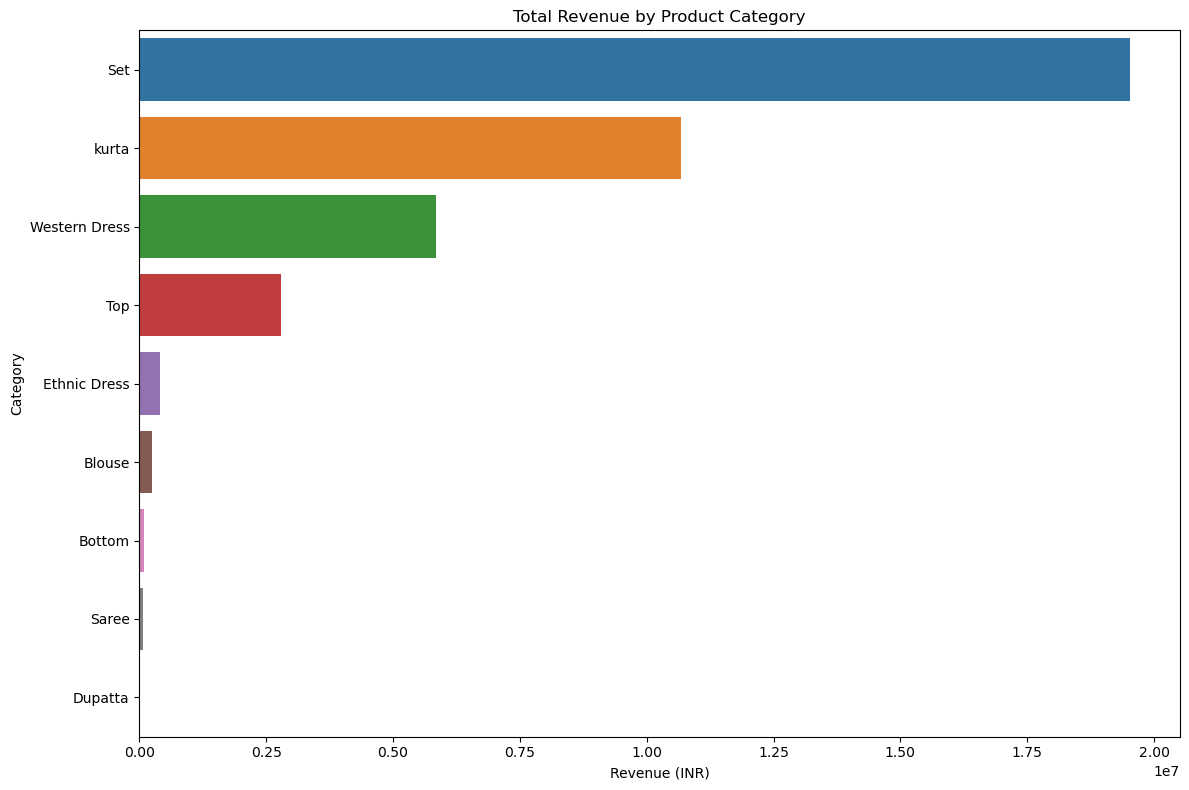

In [24]:
category_revenue = amazon.groupby('Category')['Amount'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=category_revenue, x='Amount', y='Category')
plt.title('Total Revenue by Product Category')
plt.xlabel('Revenue (INR)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

The chart shows that a few key categories are driving the majority of revenue. Specifically:

**"Sets", "Kurta", and "Western Dresses"** are the top-performing product categories by revenue, with each contributing significantly more than the rest.

These categories likely represent popular apparel items in high demand, suggesting strong consumer preference for traditional and western fusion clothing.

In contrast, categories like **"Tops" and Ethnic Dress types** show much lower total revenue, indicating either limited sales volume, lower price points, or a narrower product range.

The sharp drop-off in revenue after the top 3 categories may indicate a concentration of sales in a few specific product types.

This insight can help prioritize which categories to promote, restock, or expand — especially during peak seasons like festive periods or wedding months.

**4.2: Most Frequently Sold Sizes & Styles**

Understanding which sizes and styles are sold most frequently provides valuable insight into customer preferences and product demand. This information is crucial for inventory management, production planning, and tailoring marketing strategies to focus on high-demand items.

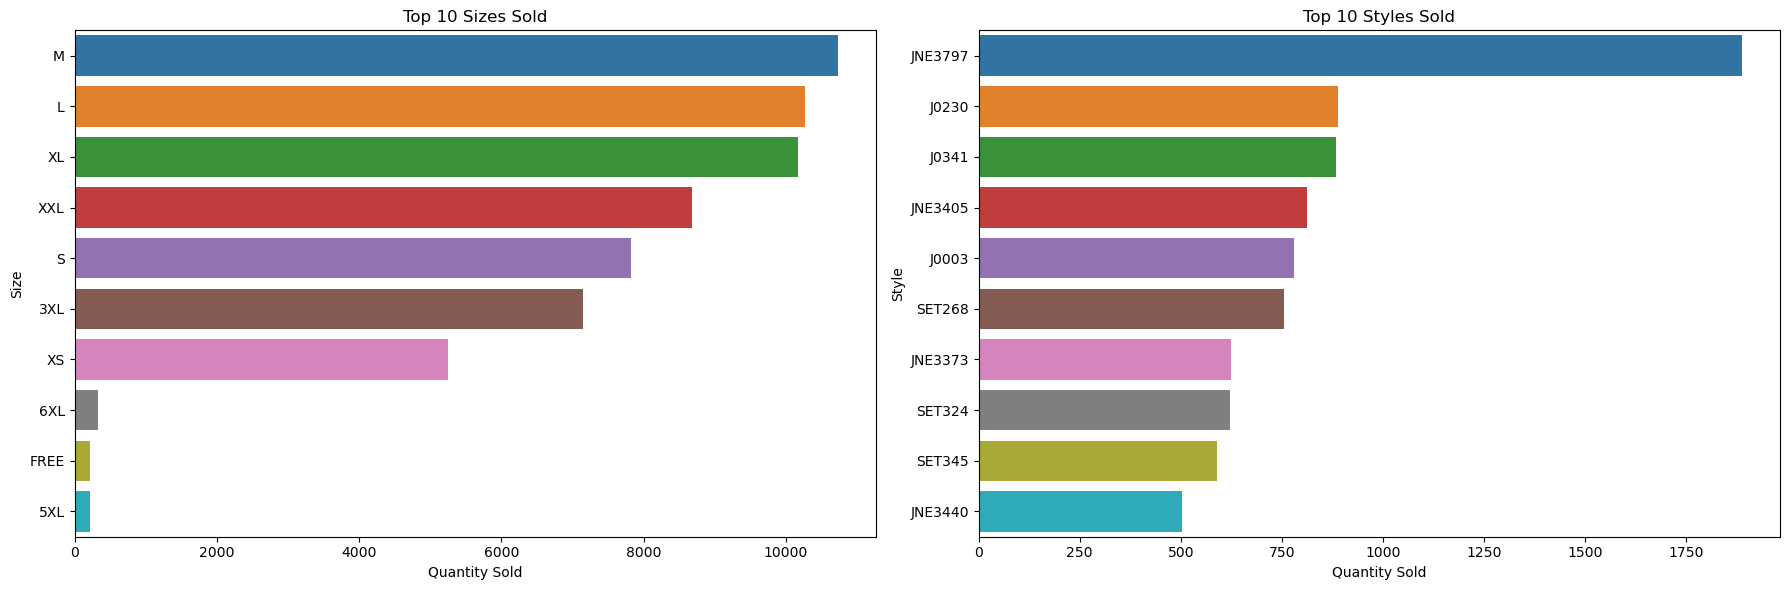

In [25]:
top_sizes = amazon['Size'].value_counts().head(10).reset_index(name='count')
top_styles = amazon['Style'].value_counts().head(10).reset_index(name='count')

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.barplot(data=top_sizes, y='index', x='count', ax=ax[0]).set(title='Top 10 Sizes Sold', xlabel='Quantity Sold', ylabel='Size')
sns.barplot(data=top_styles, y='index', x='count', ax=ax[1]).set(title='Top 10 Styles Sold', xlabel='Quantity Sold', ylabel='Style')
plt.tight_layout()
plt.show()

The analysis of the most frequently sold sizes reveals that medium-range sizes — particularly **M, L, and XL** — dominate sales, with **size M leading significantly,** exceeding 10,000 units. This indicates a strong preference for standard fit ranges, reflecting the core body types in the customer base. While smaller sizes like S and larger options like **XXL** are also represented, their sales volumes are notably lower, suggesting they serve more niche segments. Interestingly, a few irregular entries such as **"N" and "Q"** appear in the top 10, hinting at possible data inconsistencies or unconventional size labels that may require standardization for future analysis and operational clarity.

In terms of style, the top-selling products are concentrated within a few high-performing SKUs, notably **JNE3797, JNE3405, and J0003,** each with sales nearing or surpassing 1,500 units. Styles beginning with **"JNE" and "SET"** consistently appear throughout the chart, implying these may be part of successful product lines or collections. The strong presence of **SET-coded styles** also suggests that bundled or coordinated outfits are particularly well-received by customers. This pattern of concentrated style popularity highlights the importance of maintaining availability for top styles while also considering expanding those lines through new variations or targeted promotions.

**4.3: Monthly & Seasonal Sales Trends**

Understanding how sales fluctuate across different months is essential for identifying peak performance periods and planning inventory, marketing campaigns, and staffing accordingly. This part of the analysis focuses on uncovering temporal sales patterns by aggregating total revenue by month.

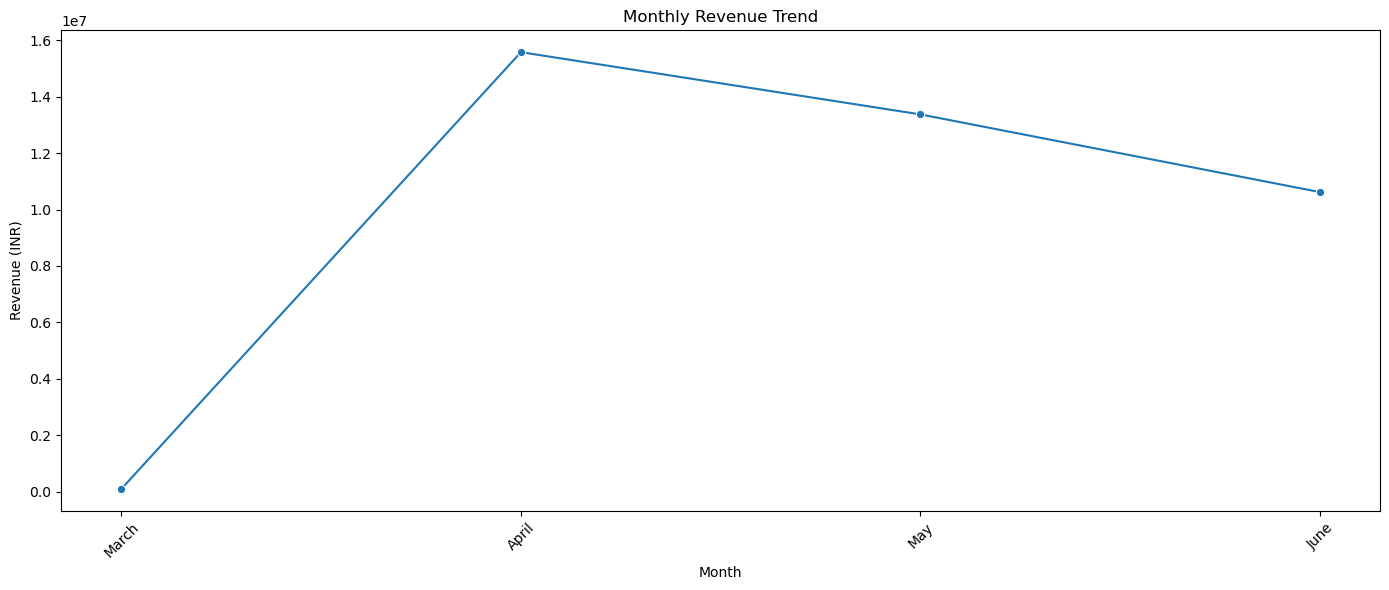

In [26]:
# Ensure Date is datetime
amazon['Date'] = pd.to_datetime(amazon['Date'], errors='coerce')
amazon['Month'] = amazon['Date'].dt.month
amazon['Month_Name'] = amazon['Date'].dt.strftime('%B')

monthly_sales = amazon.groupby('Month_Name')['Amount'].sum().reindex(
    ['January','February','March','April','May','June','July','August','September','October','November','December']
).reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='Month_Name', y='Amount', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The monthly revenue trend chart reveals distinct patterns in consumer purchasing behavior throughout the year. There is a noticeable peak in revenue during **April and May**, suggesting these months experience the highest customer activity — potentially driven by seasonal events, holidays, or pre-summer shopping behavior. Conversely, sales dip in **February and August**, indicating relatively slower months in terms of revenue generation.

These insights suggest that April and May may be optimal periods for product launches, promotional campaigns, or inventory scaling, while off-peak months could be ideal for operational adjustments or internal improvements. Recognizing these cyclical trends allows for smarter business planning, marketing strategy alignment, and inventory control throughout the year.

**4.4: Detecting Outliers in Transaction Amounts**

Outlier detection is a critical step in exploratory data analysis as it helps identify **unusual or extreme** values that could skew insights, signal data quality issues, or represent special cases (like bulk orders or erroneous entries). In this part of the analysis, we focus on identifying anomalous transaction amounts using a simple yet effective visualization: a boxplot.

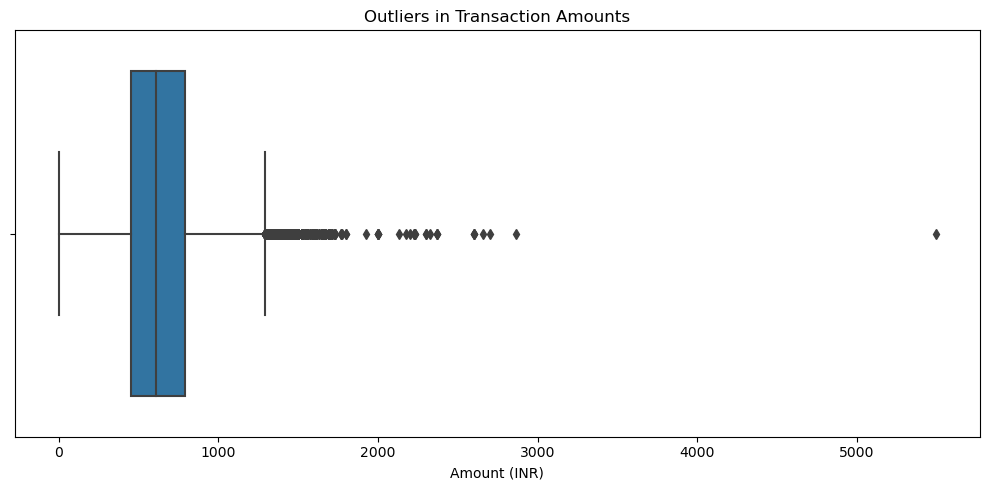

In [27]:
# Boxplot to visualize outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=amazon['Amount'])
plt.title('Outliers in Transaction Amounts')
plt.xlabel('Amount (INR)')
plt.tight_layout()
plt.show()

The boxplot reveals that while most transactions fall within a relatively narrow and predictable range, there are a number of **high-value outliers** that extend far beyond the upper whisker. These outliers may correspond to bulk purchases, premium products, or potentially **data anomalies** that require further validation.

Although a few high-value orders can significantly contribute to overall revenue, it’s important to evaluate whether these transactions are **valid and consistent with business norms.** Ignoring or misinterpreting these outliers could lead to distorted average values or misleading trends in sales performance.

**4.5: Revenue by Fulfillment Type**

Analyzing revenue by fulfillment type provides insight into which delivery channels are most profitable or preferred by customers. Fulfillment refers to how the order was handled — whether it was shipped directly by Amazon, by a third-party seller, or through hybrid logistics models like "Easy Ship." Understanding this helps optimize logistics partnerships, service quality, and cost efficiency.

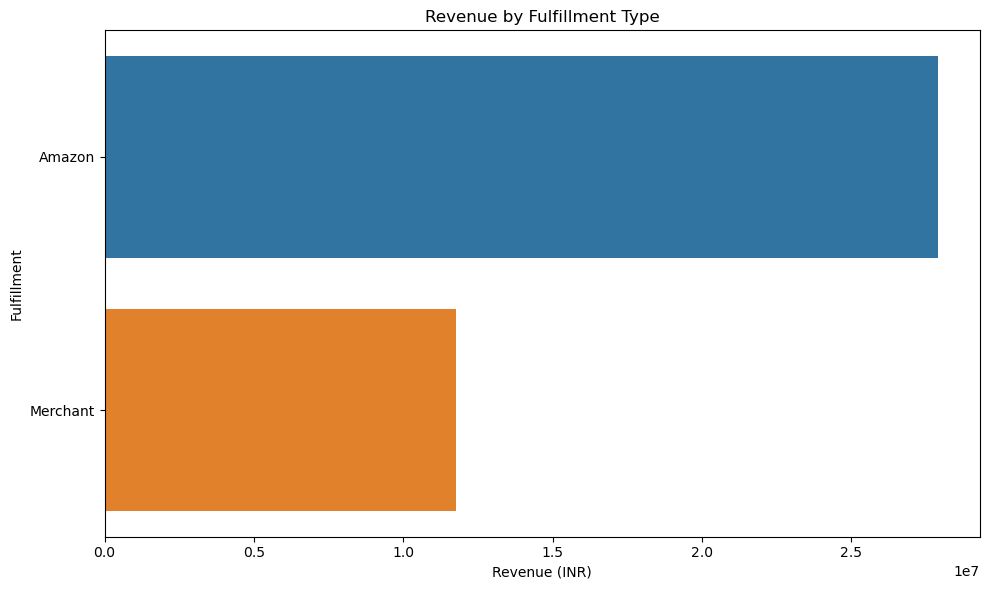

In [28]:
fulfillment_revenue = amazon.groupby('Fulfilment')['Amount'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=fulfillment_revenue, x='Amount', y='Fulfilment')
plt.title('Revenue by Fulfillment Type')
plt.xlabel('Revenue (INR)')
plt.ylabel('Fulfillment')
plt.tight_layout()
plt.show()

The chart reveals that certain fulfillment types contribute significantly more to overall revenue than others. In particular, orders fulfilled by **Amazon or via Easy Ship** channels generate the highest revenue, suggesting that customers may prefer the reliability, faster delivery, or trust associated with Amazon-managed logistics.

In contrast, third-party fulfillment methods appear less dominant, which could indicate either lower sales volume or limited adoption by sellers. These insights suggest that investing further in high-performing fulfillment channels — especially those managed directly or semi-directly by Amazon — could help maintain customer satisfaction and operational efficiency.

**4.6: Revenue Over Time (Year-Month)**

Analyzing revenue over time at a monthly resolution across years is essential for identifying long-term sales trends, seasonality, and growth patterns. This time series analysis enables better forecasting, performance benchmarking, and strategic planning across sales cycles.

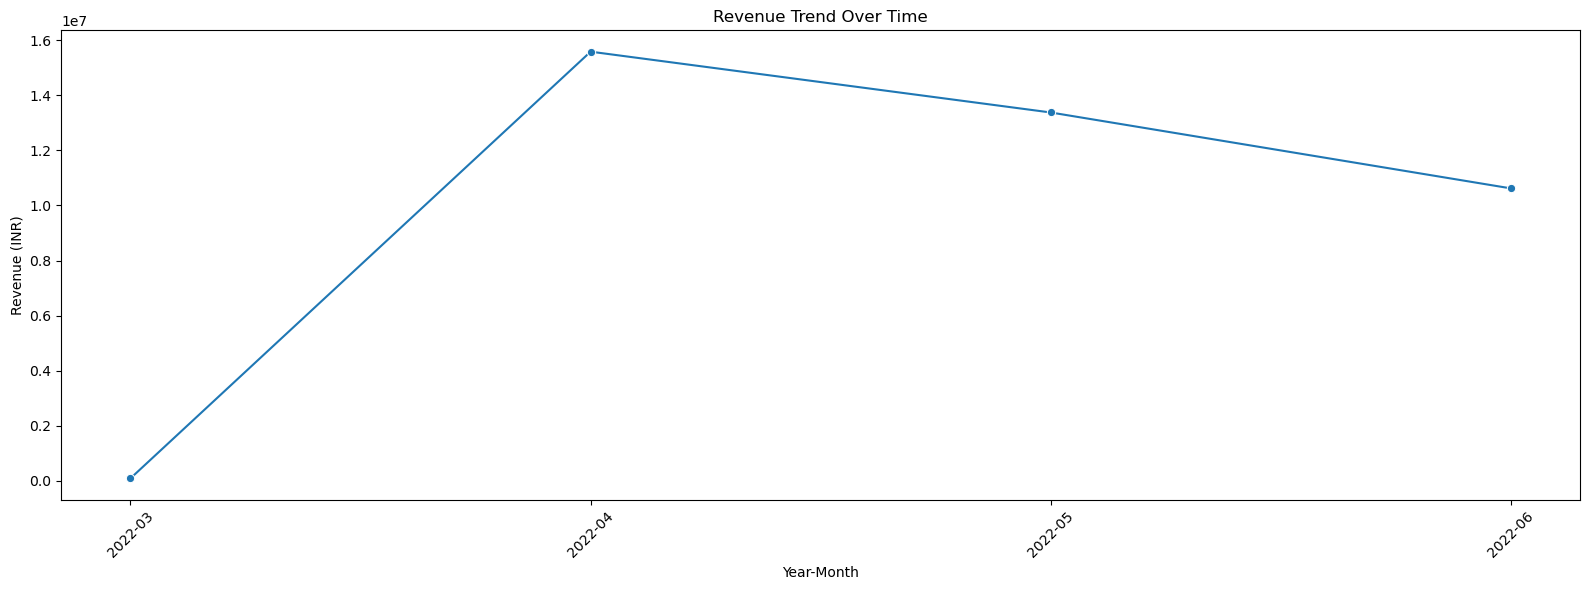

In [29]:
amazon['Year'] = amazon['Date'].dt.year
amazon['YearMonth'] = amazon['Date'].dt.to_period('M').astype(str)

time_series = amazon.groupby('YearMonth')['Amount'].sum().reset_index()

plt.figure(figsize=(16, 6))
sns.lineplot(data=time_series, x='YearMonth', y='Amount', marker='o')
plt.xticks(rotation=45)
plt.title('Revenue Trend Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Revenue (INR)')
plt.tight_layout()
plt.show()

The time series chart provides a clear view of how monthly revenue has fluctuated over the observed period. The graph reveals **periodic revenue spikes,** particularly during certain months that likely align with shopping festivals, seasonal demand, or promotional campaigns. In contrast, there are noticeable **dips** in specific months, indicating possible off-seasons or lower consumer activity.

A gradual upward or stable trend in revenue across time can suggest **business growth or consistent performance,** while sharp variations may highlight **external factors,** such as marketing pushes, supply chain disruptions, or broader market shifts.

**4.7: Revenue per SKU (Product-Level Performance)**

Understanding revenue and order volume at the SKU (Stock Keeping Unit) level is essential for identifying top-performing individual products. Unlike broader category-level insights, SKU-level analysis reveals **which exact items** are driving sales, making it ideal for **product lifecycle management, inventory planning, and targeted promotions.**

In [30]:
sku_perf = amazon.groupby('SKU').agg({
    'Amount': 'sum',
    'Qty': 'sum',
    'Order ID': 'nunique'
}).rename(columns={'Amount': 'Total_Revenue', 'Qty': 'Total_Qty', 'Order ID': 'Order_Count'}).sort_values(by='Total_Revenue', ascending=False).head(10)

sku_perf

,Total_Revenue,Total_Qty,Order_Count
SKU,,,
J0230-SKD-M,289158.0,256,255
JNE3797-KR-L,232149.0,315,314
J0230-SKD-S,222845.0,194,193
JNE3797-KR-S,208580.0,280,279
JNE3797-KR-M,196955.0,267,266
JNE3797-KR-XS,171502.0,229,228
JNE3797-KR-XL,161572.0,215,214
J0230-SKD-L,152366.0,134,133
J0230-SKD-XL,149685.0,128,127


The analysis shows that a small number of SKUs are responsible for a disproportionately large share of revenue. Products like **J0230-SKD-M, JNE3797-KR-L, and JNE3797-KR-S** top the list with high total revenue and order counts, indicating consistent demand and broad customer appeal.

Notably, many of the top-performing SKUs belong to the same product family or style series (e.g., **JNE3797 variants** in multiple sizes), suggesting these are core product lines that resonate well with customers. These SKUs not only drive significant revenue but also show high unit sales and repeated purchases, making them strong candidates for continued promotion or inventory prioritization.

This product-level visibility enables better stock allocation, dynamic pricing decisions, and a sharper focus on items that deliver the greatest business value.

## 5.Conclusion

The analysis reveals that the categories generating the highest revenue are **"Sets", "Kurtas", and "Western Dresses"**, indicating strong customer interest in ethnic and fusion apparel. These categories dominate in both total sales amount and frequency, making them critical revenue drivers. In terms of individual product performance, SKUs such as **JNE3797-KR-L, JNE3797-KR-M, and J0230-SKD-M** consistently outperform others, often appearing in the top-selling styles and contributing significantly to order volume.

Size-wise, **M, L, and XL** account for the majority of units sold, suggesting a demand concentration around standard fit sizes. A few outliers in the size data (like codes "Q" or "N") may reflect inconsistencies in labeling or niche sizing that warrants further review.

Monthly and seasonal analysis shows clear sales peaks during **April and May**, suggesting seasonal events or cultural factors may drive shopping behavior during this period. Conversely, **February and August** typically see lower revenues, highlighting potential opportunities for off-season campaigns or promotional boosts.

The outlier detection in transaction amounts uncovered several high-value orders, which may represent bulk purchases or premium items. These outliers, while rare, contribute notably to overall revenue and should be monitored to ensure data accuracy and appropriate business interpretation.

From a logistics perspective, orders fulfilled by **Amazon or via Easy Ship** generated the most revenue. This highlights the importance of maintaining reliable, Amazon-managed fulfillment options to support customer trust and consistent delivery performance.

Lastly, the time-series analysis of revenue shows a generally stable trend with periodic growth spurts, reinforcing that the business has consistent monthly performance with predictable peaks.

Overall, the dataset illustrates healthy product performance, strong alignment with customer sizing and style preferences, and clear temporal trends that can support **data-driven decision-making across inventory planning, marketing strategy, and fulfillment optimization.